In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')


In [3]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


What does the distribution of petal lengths look like?
Is there a correlation between petal length and petal width?
Would it be reasonable to predict species based on sepal width and sepal length?
Which features would be best used to predict species?

Text(6.674999999999997, 0.5, 'Petal Width')

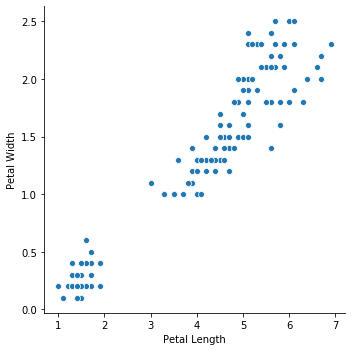

In [7]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [8]:
anscombe = sns.load_dataset('anscombe')

In [9]:
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [90]:
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


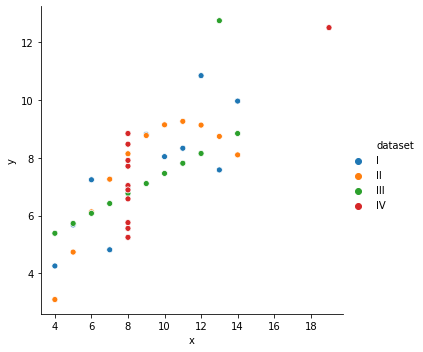

In [12]:
sns.relplot(x='x', y='y', hue="dataset",data=anscombe)

 Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? The datasets are evenly distributed.

In [13]:
anscombe.groupby("dataset").mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [14]:
anscombe.groupby('dataset').sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


In [91]:
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [21]:
from pydataset import data


In [22]:
InsectSprays = data("InsectSprays")

In [92]:
InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


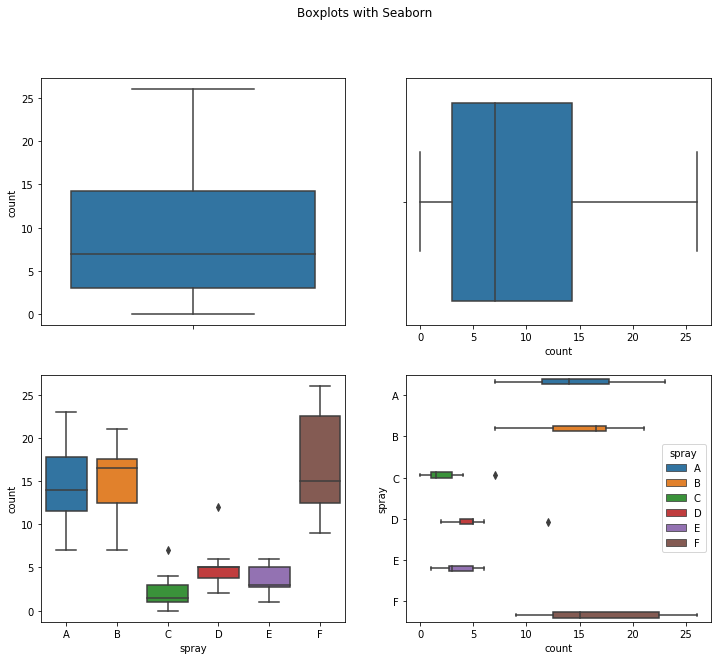

In [32]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=InsectSprays, y='count')


plt.subplot(222)
sns.boxplot(data=InsectSprays, x='count')

plt.subplot(223)
sns.boxplot(data=InsectSprays, y='count', x='spray')

plt.subplot(224)
sns.boxplot(data=InsectSprays, y='spray', x='count', hue='spray')


In [34]:
swiss = data("swiss")

In [93]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [40]:
swiss['is_Catholic'] = swiss.Catholic > 50.00

In [94]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


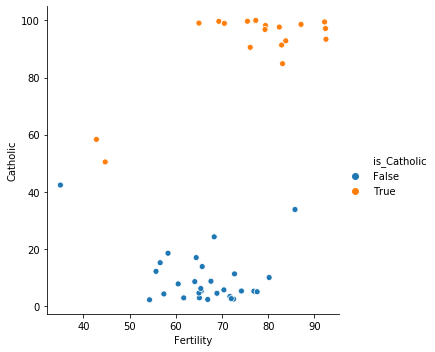

In [96]:
sns.relplot(x='Fertility', y='Catholic', hue="is_Catholic", data=swiss)

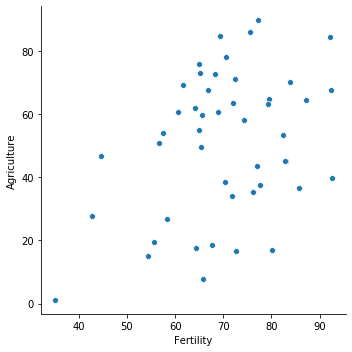

In [98]:
sns.relplot(x='Fertility', y='Agriculture', data=swiss)

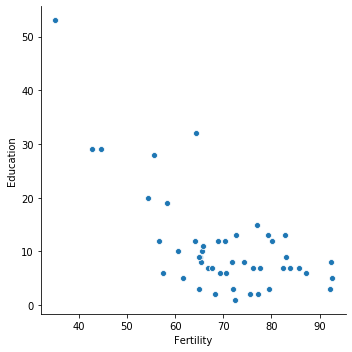

In [47]:
sns.relplot(x='Fertility', y='Education', data=swiss)

Education has an impact on fertility. The less education, the higher the fertility rate.


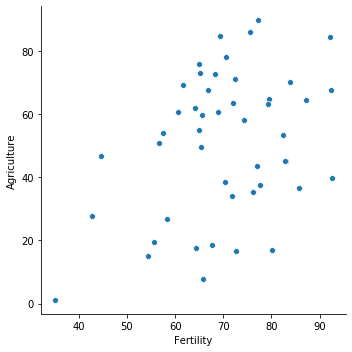

In [100]:
sns.relplot(x='Fertility', y='Agriculture',  data=swiss)

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [51]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [65]:
orders = pd.read_sql('SELECT * FROM orders', url)

In [88]:
most_popular = orders.groupby("item_name").quantity.agg(['sum']).sort_values(by="sum", ascending=False).head(4)

In [89]:
most_popular

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


most_popular